## Q10 - Train a deep MLP on the MNIST dataset

In [122]:
import tensorflow as ts
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [8]:
print(ts.__version__)
keras.__version__

2.5.0


'2.5.0'

In [10]:
mnist_dataset = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist_dataset.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [18]:
print(X_train_full.shape)
print(X_test.shape)

(55000, 28, 28)
(5000, 28, 28)


In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [19]:
print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


In [63]:
def plot_digits(images, n_rows = 5, images_per_row=10): 
    row_images = []
    n_empty = n_rows * images_per_row - len(images)
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = 'binary')
    plt.axis("off")

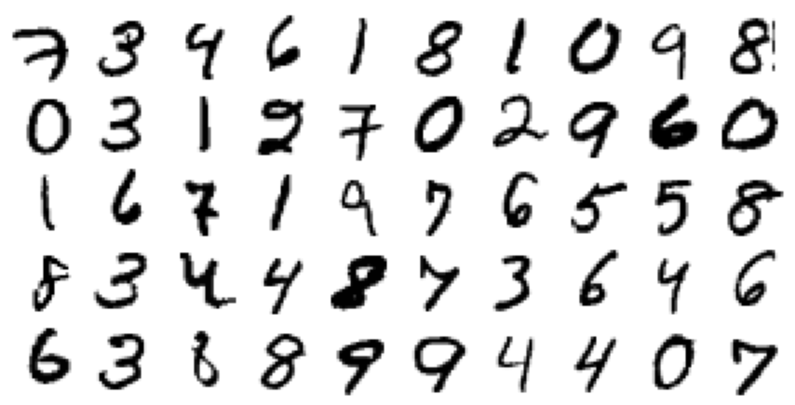

In [125]:
plt.figure(figsize=(14,8))
example_images = X_train[:50]
plot_digits(example_images)

In [169]:
clf_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax", name="output")
    ])

In [170]:
clf_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_71 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_72 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_73 (Dense)             (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 407,110
Trainable params: 407,110
Non-trainable params: 0
_______________________________________________

In [171]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [172]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
earlystop_cb = keras.callbacks.EarlyStopping(patience=10)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
callbacks = [lr_scheduler, checkpoint_cb, earlystop_cb]

In [179]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
clf_model.compile(loss="sparse_categorical_crossentropy",
    optimizer='sgd',
    metrics=['accuracy'])

In [180]:
history = clf_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks, verbose=1)

Epoch 1/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3218 - accuracy: 0.9071 - val_loss: 0.2374 - val_accuracy: 0.9314
Epoch 2/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2112 - accuracy: 0.9382 - val_loss: 0.1712 - val_accuracy: 0.9504
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1657 - accuracy: 0.9518 - val_loss: 0.1451 - val_accuracy: 0.9594
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1390 - accuracy: 0.9588 - val_loss: 0.1302 - val_accuracy: 0.9622
Epoch 5/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1201 - accuracy: 0.9646 - val_loss: 0.1218 - val_accuracy: 0.9658
Epoch 6/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1065 - accuracy: 0.9688 - val_loss: 0.1137 - val_accuracy: 0.9672
Epoch 7/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0957 - accuracy: 0.9727 - val_loss: 0.1039 - val_ac

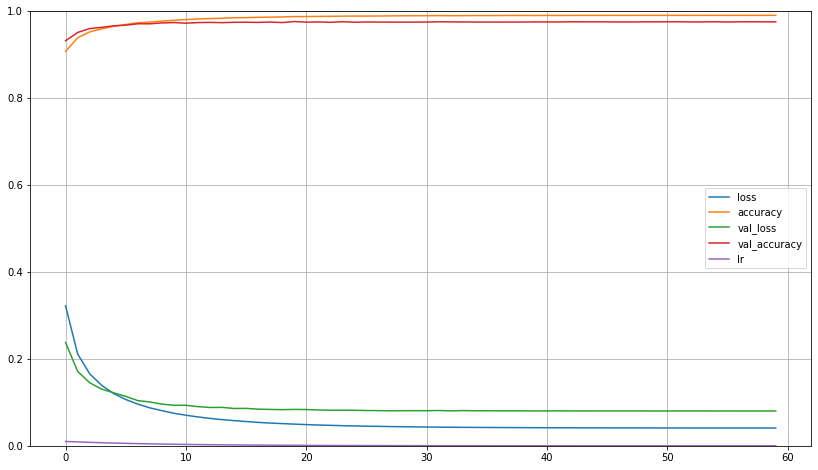

In [181]:
pd.DataFrame(history.history).plot(figsize=(14, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [182]:
clf_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 14.5346 - accuracy: 0.9739


[14.534578323364258, 0.9739000201225281]